## Prueba de Flow ML

Por: Daning Montaño

## Carga de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mlflow
import os
from mlflow.tracking import MlflowClient

## Carga de datos

In [2]:
titanic = pd.read_excel("Data/titanic_data.xlsx")
titanic.shape

(891, 12)

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanic.drop(['Cabin','Name','Ticket', 'Embarked', 'PassengerId'], axis = 1, inplace=True)
titanic.dropna(inplace=True)
titanic.shape

(714, 7)

In [6]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


## Gráficos Exploratorios

C:\Users\Daning\AppData\Local\Temp\ipykernel_26196\473737293.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(valores, labels=categorias)


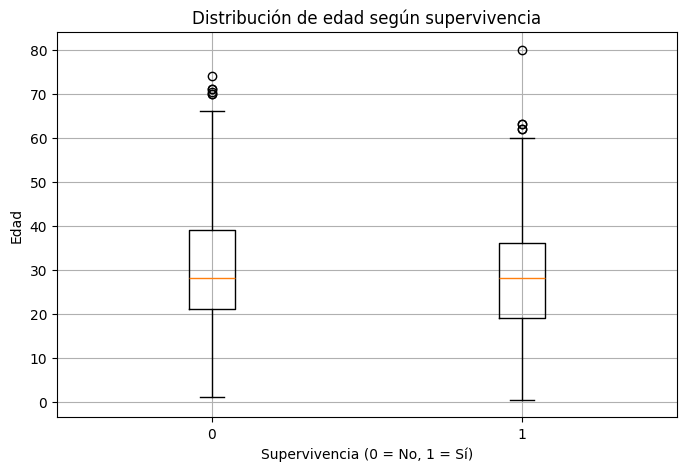

In [7]:
categorias = sorted(titanic['Survived'].unique())
valores = [titanic.loc[titanic['Survived'] == cat, 'Age'].dropna() for cat in categorias]

# Boxplot con matplotlib
plt.figure(figsize=(8, 5))
plt.boxplot(valores, labels=categorias)
plt.xlabel('Supervivencia (0 = No, 1 = Sí)')
plt.ylabel('Edad')
plt.title('Distribución de edad según supervivencia')
plt.grid(True)
plt.show()

C:\Users\Daning\AppData\Local\Temp\ipykernel_26196\112373682.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(valores, labels=categorias)


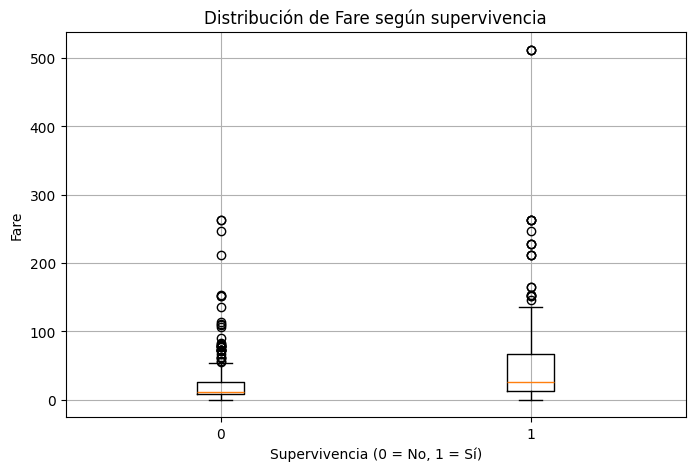

In [8]:
categorias = sorted(titanic['Survived'].unique())
valores = [titanic.loc[titanic['Survived'] == cat, 'Fare'].dropna() for cat in categorias]

# Boxplot con matplotlib
plt.figure(figsize=(8, 5))
plt.boxplot(valores, labels=categorias)
plt.xlabel('Supervivencia (0 = No, 1 = Sí)')
plt.ylabel('Fare')
plt.title('Distribución de Fare según supervivencia')
plt.grid(True)
plt.show()

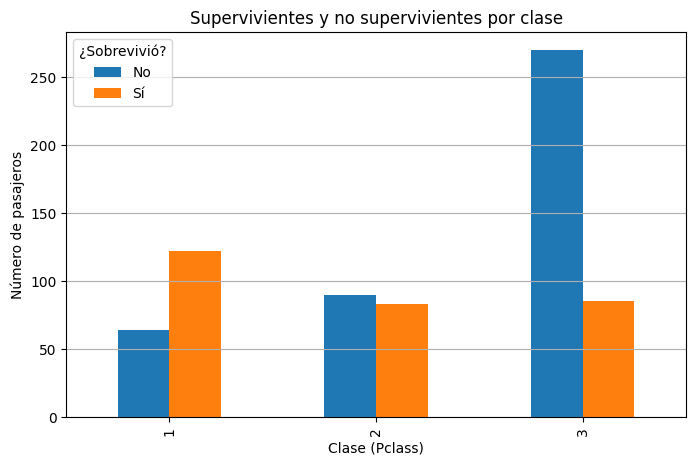

In [9]:
conteo = pd.crosstab(titanic['Pclass'], titanic['Survived'])

# Crear gráfico de barras no apilado
conteo.plot(kind='bar', stacked=False, figsize=(8, 5))

# Etiquetas y título
plt.xlabel('Clase (Pclass)')
plt.ylabel('Número de pasajeros')
plt.title('Supervivientes y no supervivientes por clase')
plt.legend(title='¿Sobrevivió?', labels=['No', 'Sí'])
plt.grid(axis='y')
plt.show()

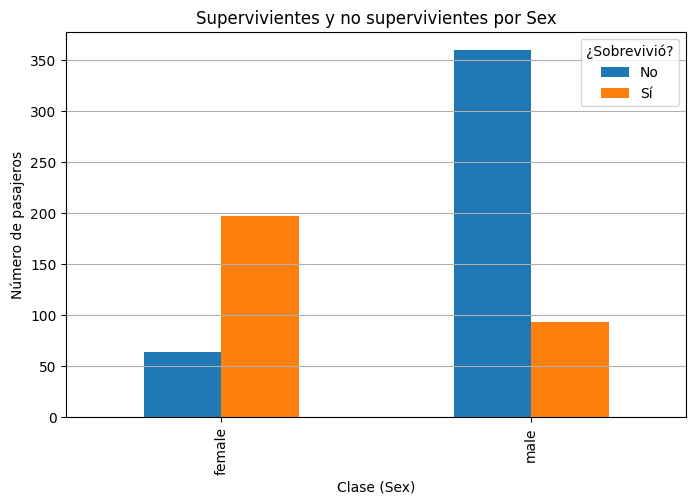

In [10]:
conteo = pd.crosstab(titanic['Sex'], titanic['Survived'])

# Crear gráfico de barras no apilado
conteo.plot(kind='bar', stacked=False, figsize=(8, 5))

# Etiquetas y título
plt.xlabel('Clase (Sex)')
plt.ylabel('Número de pasajeros')
plt.title('Supervivientes y no supervivientes por Sex')
plt.legend(title='¿Sobrevivió?', labels=['No', 'Sí'])
plt.grid(axis='y')
plt.show()

## Entrenamiento del modelo

In [11]:


# 1. Definir carpeta local para almacenar experimentos
project_root = os.getcwd()
mlruns_path  = os.path.join(project_root, "mlruns")
os.makedirs(mlruns_path, exist_ok=True)

# 2. Apuntar MLflow al file-store local (evita latencia HTTP)
#    En Windows, usar file:/// con tres barras o ruta sin prefijo.
mlflow.set_tracking_uri(f"file:///{mlruns_path.replace(os.sep, '/')}")

# 3. Crear o seleccionar experimento
experiment_name = "titanic"
mlflow.set_experiment(experiment_name)




2025/05/18 22:21:37 INFO mlflow.tracking.fluent: Experiment with name 'titanic' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///c:/ACADEMICO/UTPL/herramientas_inteligencia_artificial/EJERCICIO_ML_FLOW/mlruns/995784723300338389', creation_time=1747624897184, experiment_id='995784723300338389', last_update_time=1747624897184, lifecycle_stage='active', name='titanic', tags={}>

In [35]:
import mlflow.sklearn
from sklearn.ensemble       import RandomForestClassifier
from sklearn.metrics        import accuracy_score
from sklearn.model_selection import train_test_split

# 1. Preprocesamiento (igual que antes)
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X, y = titanic[features], titanic["Survived"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 2. Autolog para métricas y artefactos
mlflow.sklearn.autolog()

# 3. Run de MLflow con logging explícito de parámetros
with mlflow.start_run(run_name="rf_baseline_with_params"):
    # Definición de hiperparámetros
    params = {
        "n_estimators": 90,
        "max_depth":    7,
        "random_state": 42
    }
    # 3.1 Registrar los parámetros
    mlflow.log_params(params)

    # 3.2 Entrenar
    rf = RandomForestClassifier(**params)
    rf.fit(X_train, y_train)

    # 3.3 Predecir y calcular métricas
    preds = rf.predict(X_test)
    acc   = accuracy_score(y_test, preds)

    # 3.4 Registrar manualmente la métrica 'accuracy'
    mlflow.log_metric("accuracy", acc)

    # 3.5 (Opcional) guardar el modelo como artefacto
    # mlflow.sklearn.log_model(rf, artifact_path="model")

    # 3.6 Mostrar resultado
    print(f"Parameters: {params}")
    print(f"Accuracy : {acc:.4f}")






2025/05/18 22:45:46 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Daning\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/05/18 22:45:46 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Daning\AppData\

Parameters: {'n_estimators': 90, 'max_depth': 7, 'random_state': 42}
Accuracy : 0.7209


In [16]:
import subprocess
# 1. Construye la ruta absoluta a mlruns (convierte '\' en '/')
project_root = os.getcwd()
mlruns_path  = os.path.join(project_root, "mlruns").replace("\\", "/")

# 2. Monta el comando tal cual lo harías en la terminal
cmd = [
    "mlflow", "ui",
    "--backend-store-uri",    f"file:///{mlruns_path}",
    "--default-artifact-root",f"file:///{mlruns_path}",
    "--port",                 "9090"
]

# 3. Lanza el proceso en background
#    stdout/stderr se envían a pipes; no bloquea la ejecución de la celda
process = subprocess.Popen(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

print("✔ MLflow UI arrancado en http://localhost:9090")

✔ MLflow UI arrancado en http://localhost:9090
